/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


------------------------------------------------------------------------------------------------------------
Star Migration



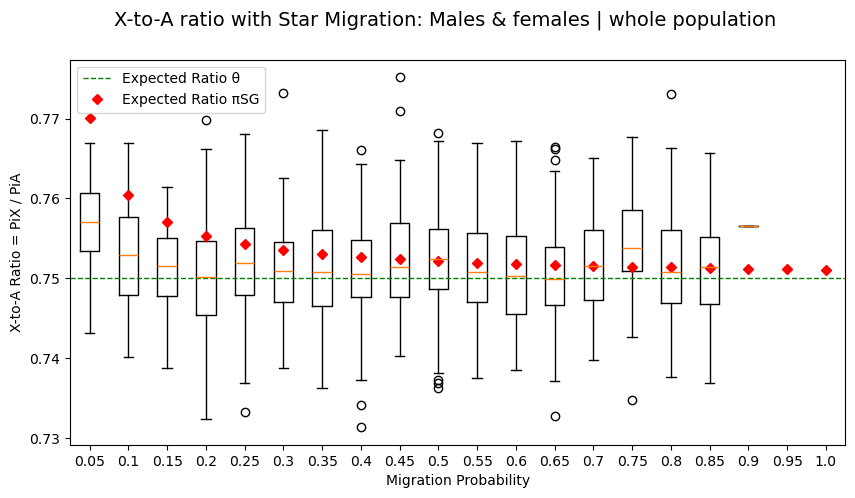

------------------------------------------------------------------------------------------------------------
Circle Migration



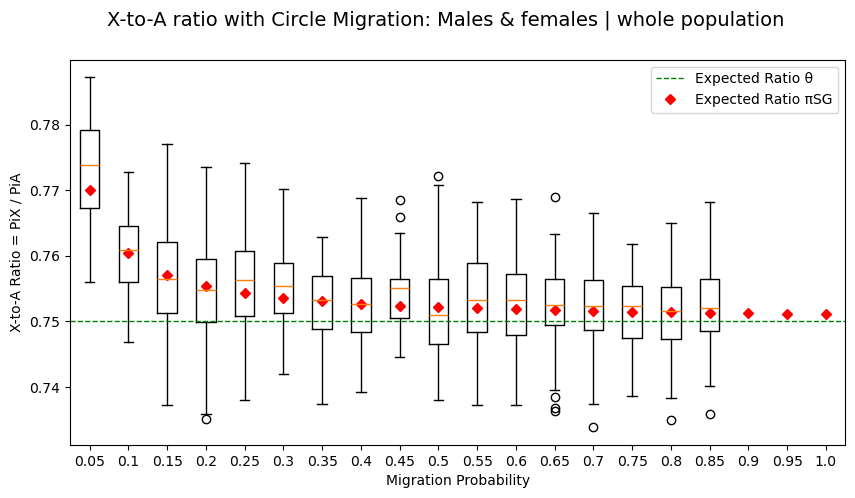

In [1]:
# Pi on whole population
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/Migrations/NWFV_MigV2_WMF/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWFV_MigV2_WMF/"

Prob_Mig = [k/20 for k in range(1,20)]+[1.0]
LRatio_star = [0 for k in range (len(Prob_Mig))]
LRatio_circle = [0 for k in range (len(Prob_Mig))]
counter = 0

expected_ratio = 0.75
#Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
#expected_teta = round (4*Ne*1.25e-8,10)
n = 15
NeA = 50
NeX = 3/4 * NeA
mu = 40 * 1.25e-8
Pi_SA = 4*n*NeA*mu
Pi_SX = 4*n*NeX*mu
L_PiTX_PiTA = []

for pmig in Prob_Mig:
    mA = 0 + 1/2 * (pmig+pmig)
    mX = 0 + 1/3 * (pmig+2*pmig)
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    L_PiTX_PiTA.append(PiTX_PiTA)
    
    Star = []
    Circle = []
    for NUM in range(1,501):
        File = FOLDER+"NWFV_WMF_star_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                Star.append(float(Values[1])/float(Values[0]))
            Text.close()
            
        File = FOLDER+"NWFV_WMF_circle_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                Circle.append(float(Values[1])/float(Values[0]))
            Text.close()
    
    LRatio_star[counter] = Star
    LRatio_circle[counter] = Circle
    counter += 1
    Star_median = np.median(Star)
    Circle_median = np.median(Circle)
    #print("------------------------------------------------------------------------------------------------------------")
    #print("Migration Probability = "+str(pmig))
    #print("Expected Ratio: ",expected_ratio)
    #print("Expected Ratio with Subpopulations: ",round (PiTX_PiTA,3))
    #print()
    #print("Number of star simulations: ",len(Star))
    #print("Median Ratio: ",Star_median)
    #print()
    #print("Number of Circle simulations: ",len(Circle))
    #print("Median Ratio: ",Circle_median)

print("------------------------------------------------------------------------------------------------------------")
print("Star Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A ratio with Star Migration: Males & females | whole population", fontsize=14)

ax.boxplot(LRatio_star,tick_labels=Prob_Mig)
ax.set_xlabel("Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio θ')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio πTG')
ax.legend()

#fig.savefig(FOLDER_output+'NWFV_MigV2_star.png') 
mp.show()


print("------------------------------------------------------------------------------------------------------------")
print("Circle Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A ratio with Circle Migration: Males & females | whole population", fontsize=14)

ax.boxplot(LRatio_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio θ')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio πTG')
ax.legend() 

#fig.savefig(FOLDER_output+'NWFV_MigV2_circle.png') 
mp.show()

/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


------------------------------------------------------------------------------------------------------------
Star Migration



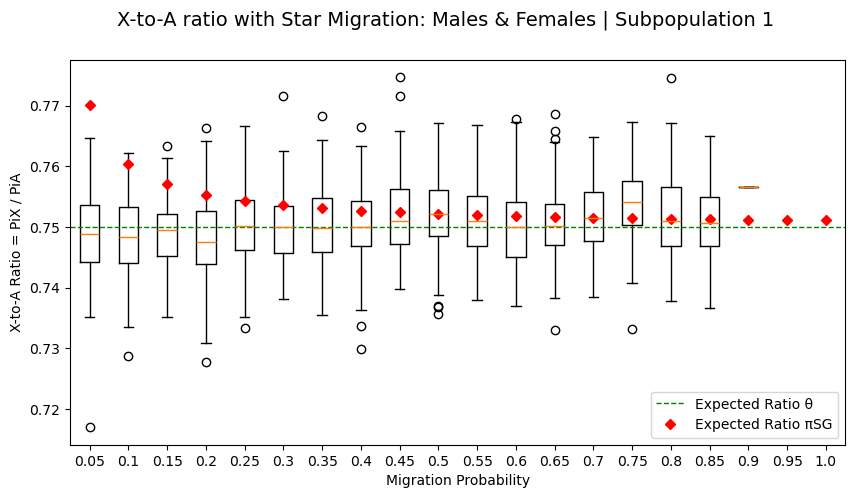

------------------------------------------------------------------------------------------------------------
Circle Migration



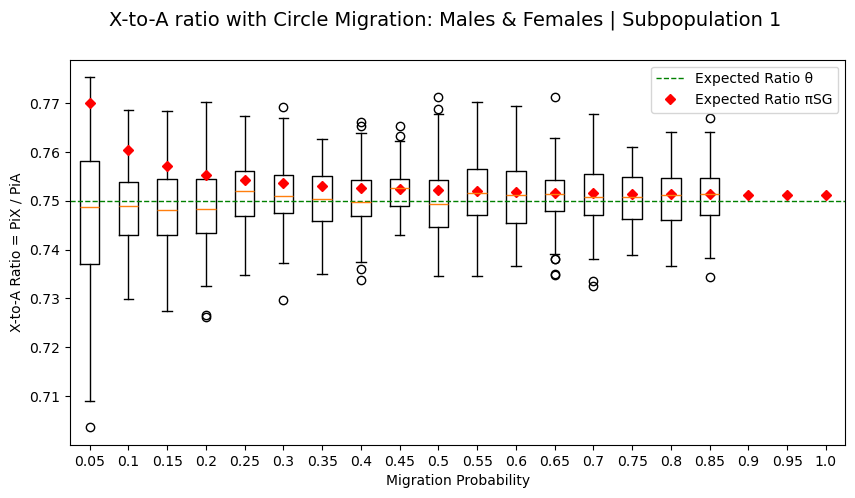

In [2]:
# Pi on one population
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/Migrations/NWFV_MigV2_WMF/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWFV_MigV2_WMF/"

Prob_Mig = [k/20 for k in range(1,20)]+[1.0]
LRatio_star = [0 for k in range (len(Prob_Mig))]
LRatio_circle = [0 for k in range (len(Prob_Mig))]
counter = 0
id_pop = 0 # 0 to 14

expected_ratio = 0.75
#Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
#expected_teta = round (4*Ne*1.25e-8,10)
n = 15
NeA = 50
NeX = 3/4 * NeA
mu = 40 * 1.25e-8
Pi_SA = 4*n*NeA*mu
Pi_SX = 4*n*NeX*mu
L_PiTX_PiTA = []


for pmig in Prob_Mig:
    mA = 0 + 1/2 * (pmig+pmig)
    mX = 0 + 1/3 * (pmig+2*pmig)
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    L_PiTX_PiTA.append(PiTX_PiTA)
    
    Star = []
    Circle = []
    for NUM in range(1,501):
        File = FOLDER+"NWFV_WMF_star_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > (id_pop+1)*3:
                Star.append(float(Values[(id_pop+1)*3+1])/float(Values[(id_pop+1)*3+0]))
            Text.close()
            
        File = FOLDER+"NWFV_WMF_circle_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                Circle.append(float(Values[(id_pop+1)*3+1])/float(Values[(id_pop+1)*3+0]))
            Text.close()
    
    LRatio_star[counter] = Star
    LRatio_circle[counter] = Circle
    counter += 1
    Star_median = np.median(Star)
    Circle_median = np.median(Circle)
    #print("------------------------------------------------------------------------------------------------------------")
    #print("Migration Probability = "+str(pmig))
    #print("Expected Ratio: ",expected_ratio)
    #print("Expected Ratio with Subpopulations: ",round (PiTX_PiTA,3))
    #print()
    #print("Number of star simulations: ",len(Star))
    #print("Median Ratio: ",Star_median)
    #print()
    #print("Number of Circle simulations: ",len(Circle))
    #print("Median Ratio: ",Circle_median)

print("------------------------------------------------------------------------------------------------------------")
print("Star Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A ratio with Star Migration: Males & Females | Subpopulation 1", fontsize=14)

ax.boxplot(LRatio_star,tick_labels=Prob_Mig)
ax.set_xlabel("Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio θ')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio πTG')
ax.legend()

#fig.savefig(FOLDER_output+'NWFV_MigV2_star.png') 
mp.show()


print("------------------------------------------------------------------------------------------------------------")
print("Circle Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("X-to-A ratio with Circle Migration: Males & Females | Subpopulation 1", fontsize=14)

ax.boxplot(LRatio_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio θ')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='Expected Ratio πTG')
ax.legend() 

#fig.savefig(FOLDER_output+'NWFV_MigV2_circle.png') 
mp.show()